In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [21]:
water_level=pd.read_csv("chennai_reservoir_levels.csv")

In [22]:
water_level.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,01-01-2004,3.9,0.0,268.0,0.0
1,02-01-2004,3.9,0.0,268.0,0.0
2,03-01-2004,3.9,0.0,267.0,0.0
3,04-01-2004,3.9,0.0,267.0,0.0
4,05-01-2004,3.8,0.0,267.0,0.0


In [23]:
Data={'unique_value':water_level.nunique(),
           'null_value':water_level.isnull().sum(),
           'data_type':water_level.dtypes}

In [24]:
Data

{'unique_value': Date               5647
 POONDI             2017
 CHOLAVARAM          883
 REDHILLS           2299
 CHEMBARAMBAKKAM    2329
 dtype: int64, 'null_value': Date               0
 POONDI             0
 CHOLAVARAM         0
 REDHILLS           0
 CHEMBARAMBAKKAM    0
 dtype: int64, 'data_type': Date                object
 POONDI             float64
 CHOLAVARAM         float64
 REDHILLS           float64
 CHEMBARAMBAKKAM    float64
 dtype: object}

In [25]:
pd.DataFrame(Data)

,unique_value,null_value,data_type
Date,5647,0,object
POONDI,2017,0,float64
CHOLAVARAM,883,0,float64
REDHILLS,2299,0,float64
CHEMBARAMBAKKAM,2329,0,float64


In [28]:
water_level.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
POONDI,5647.0,1133.272203,1026.009311,0.9,213.0,782.0,2006.0,3231.0
CHOLAVARAM,5647.0,240.020572,274.601731,0.0,22.3,92.0,460.0,896.0
REDHILLS,5647.0,1568.345573,890.363617,0.0,849.0,1630.0,2236.0,3300.0
CHEMBARAMBAKKAM,5647.0,1321.381645,957.057834,0.0,471.5,1225.0,2083.0,3396.0


In [31]:
water_level.Date=pd.to_datetime(water_level.Date)

In [32]:
water_level.dtypes

Date               datetime64[ns]
POONDI                    float64
CHOLAVARAM                float64
REDHILLS                  float64
CHEMBARAMBAKKAM           float64
dtype: object

In [33]:
water_level['Year'] = water_level.Date.dt.year
water_level['Month'] = water_level.Date.dt.month
water_level['Total'] = water_level.POONDI + water_level.CHOLAVARAM + water_level.REDHILLS + water_level.CHEMBARAMBAKKAM

water_level.Month.replace([1,2,3,4,5,6,7,8,9,10,11,12],
             ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], inplace = True)

water_level.Month = pd.Categorical(water_level.Month,
                                   ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], 
                                   ordered = True )



lakes = ['POONDI','CHOLAVARAM','REDHILLS','CHEMBARAMBAKKAM','Total']
water_level.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,Year,Month,Total
0,2004-01-01,3.9,0.0,268.0,0.0,2004,Jan,271.9
1,2004-02-01,3.9,0.0,268.0,0.0,2004,Feb,271.9
2,2004-03-01,3.9,0.0,267.0,0.0,2004,Mar,270.9
3,2004-04-01,3.9,0.0,267.0,0.0,2004,Apr,270.9
4,2004-05-01,3.8,0.0,267.0,0.0,2004,May,270.8


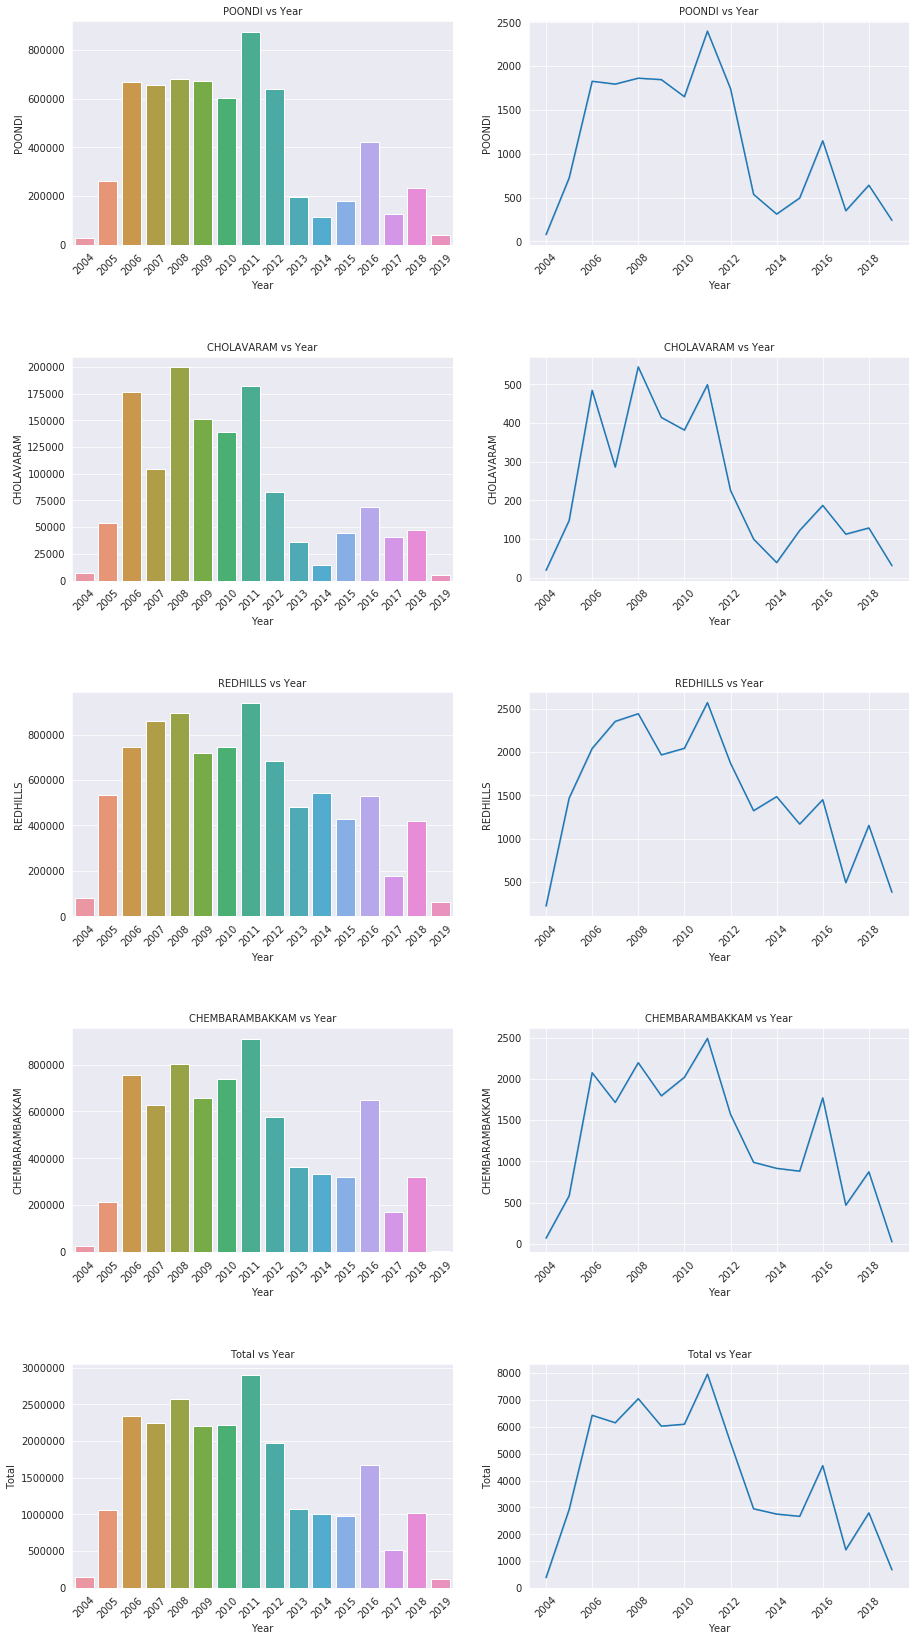

In [36]:
year = water_level.groupby('Year').sum().reset_index()

plt.figure(figsize = (15,35))

i = 0
for lake in lakes:
    plt.subplot(6,2, i+1)
    sns.barplot( x= 'Year' ,y = lake, data = year)
    plt.xticks(rotation = 45)
    plt.xlabel('Year')
    plt.ylabel(lake)
    plt.title(lake + ' vs Year', size = 10)
        
    plt.subplot(6,2, i+2)
    sns.lineplot(x = 'Year', y = lake, data = water_level,ci = False)
    plt.xticks(rotation = 45)
    plt.xlabel('Year')
    plt.ylabel(lake)
    plt.title(lake + ' vs Year', size = 10)
    plt.subplots_adjust(hspace = 0.5)
    i+=2

plt.show()


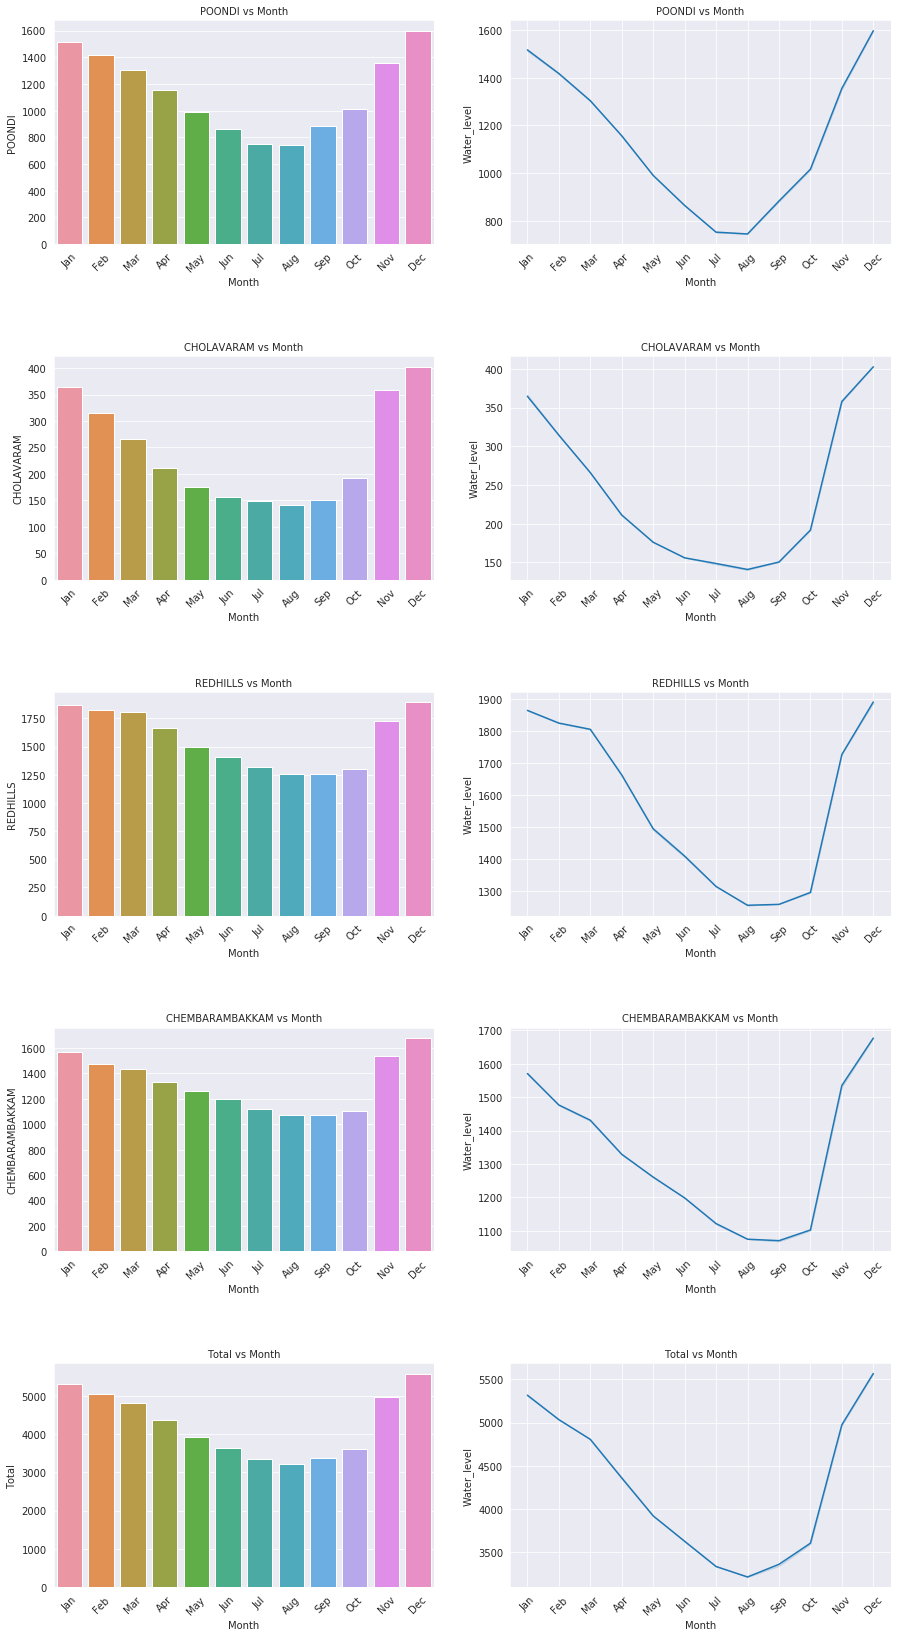

In [37]:
month = water_level.groupby('Month').mean().reset_index()

plt.figure(figsize = (15,35))

i = 0
for lake in lakes:
    plt.subplot(6,2, i+1)
    sns.barplot( x= 'Month' ,y = lake, data = month)
    plt.xticks(rotation = 45)
    plt.xlabel('Month')
    plt.ylabel(lake)
    plt.title(lake + ' vs Month', size = 10)
        
    plt.subplot(6,2, i+2)
    sns.lineplot(x = 'Month', y = lake, data = water_level, ci = False)
    plt.xticks(rotation = 45)
    plt.xlabel('Month')
    plt.ylabel('Water_level')
    plt.title(lake + ' vs Month', size = 10)
    plt.subplots_adjust(hspace = 0.5)
    i+=2

plt.show()

In [39]:
rainfall=pd.read_csv("chennai_reservoir_rainfall.csv")

In [40]:
rainfall.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,01-01-2004,0.0,0.0,0.0,0.0
1,02-01-2004,0.0,0.0,0.0,0.0
2,03-01-2004,0.0,0.0,0.0,0.0
3,04-01-2004,0.0,0.0,0.0,0.0
4,05-01-2004,0.0,0.0,0.0,0.0


In [45]:
Rain_Data={'unique_value':rainfall.nunique(),
           'null_value':rainfall.isnull().sum(),
           'data_type':rainfall.dtypes}

In [46]:
Rain_Data

{'unique_value': Date               5647
 POONDI              227
 CHOLAVARAM          109
 REDHILLS            175
 CHEMBARAMBAKKAM     126
 dtype: int64, 'null_value': Date               0
 POONDI             0
 CHOLAVARAM         0
 REDHILLS           0
 CHEMBARAMBAKKAM    0
 dtype: int64, 'data_type': Date                object
 POONDI             float64
 CHOLAVARAM         float64
 REDHILLS           float64
 CHEMBARAMBAKKAM    float64
 dtype: object}

In [48]:
pd.DataFrame(Rain_Data)

,unique_value,null_value,data_type
Date,5647,0,object
POONDI,227,0,float64
CHOLAVARAM,109,0,float64
REDHILLS,175,0,float64
CHEMBARAMBAKKAM,126,0,float64


In [49]:
rainfall.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
POONDI,5647.0,3.364486,12.755029,0.0,0.0,0.0,0.0,300.0
CHOLAVARAM,5647.0,3.617177,14.078840,0.0,0.0,0.0,0.0,293.0
REDHILLS,5647.0,3.756862,15.060551,0.0,0.0,0.0,0.0,320.0
CHEMBARAMBAKKAM,5647.0,3.923862,16.287227,0.0,0.0,0.0,0.0,475.0


In [50]:
rainfall.Date=pd.to_datetime(rainfall.Date)

In [51]:
rainfall.dtypes

Date               datetime64[ns]
POONDI                    float64
CHOLAVARAM                float64
REDHILLS                  float64
CHEMBARAMBAKKAM           float64
dtype: object

In [60]:
rainfall['Year'] = rainfall.Date.dt.year
rainfall['Month'] = rainfall.Date.dt.month
rainfall['Total'] = rainfall.POONDI + rainfall.CHOLAVARAM + rainfall.REDHILLS + rainfall.CHEMBARAMBAKKAM

rainfall.Month.replace([1,2,3,4,5,6,7,8,9,10,11,12],
             ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], inplace = True)

rainfall.Month = pd.Categorical(rainfall.Month,
                                   ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], 
                                   ordered = True )



Lakes = ['POONDI','CHOLAVARAM','REDHILLS','CHEMBARAMBAKKAM','Total']
rainfall.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,Year,Month,Total
0,2004-01-01,0.0,0.0,0.0,0.0,2004,Jan,0.0
1,2004-02-01,0.0,0.0,0.0,0.0,2004,Feb,0.0
2,2004-03-01,0.0,0.0,0.0,0.0,2004,Mar,0.0
3,2004-04-01,0.0,0.0,0.0,0.0,2004,Apr,0.0
4,2004-05-01,0.0,0.0,0.0,0.0,2004,May,0.0


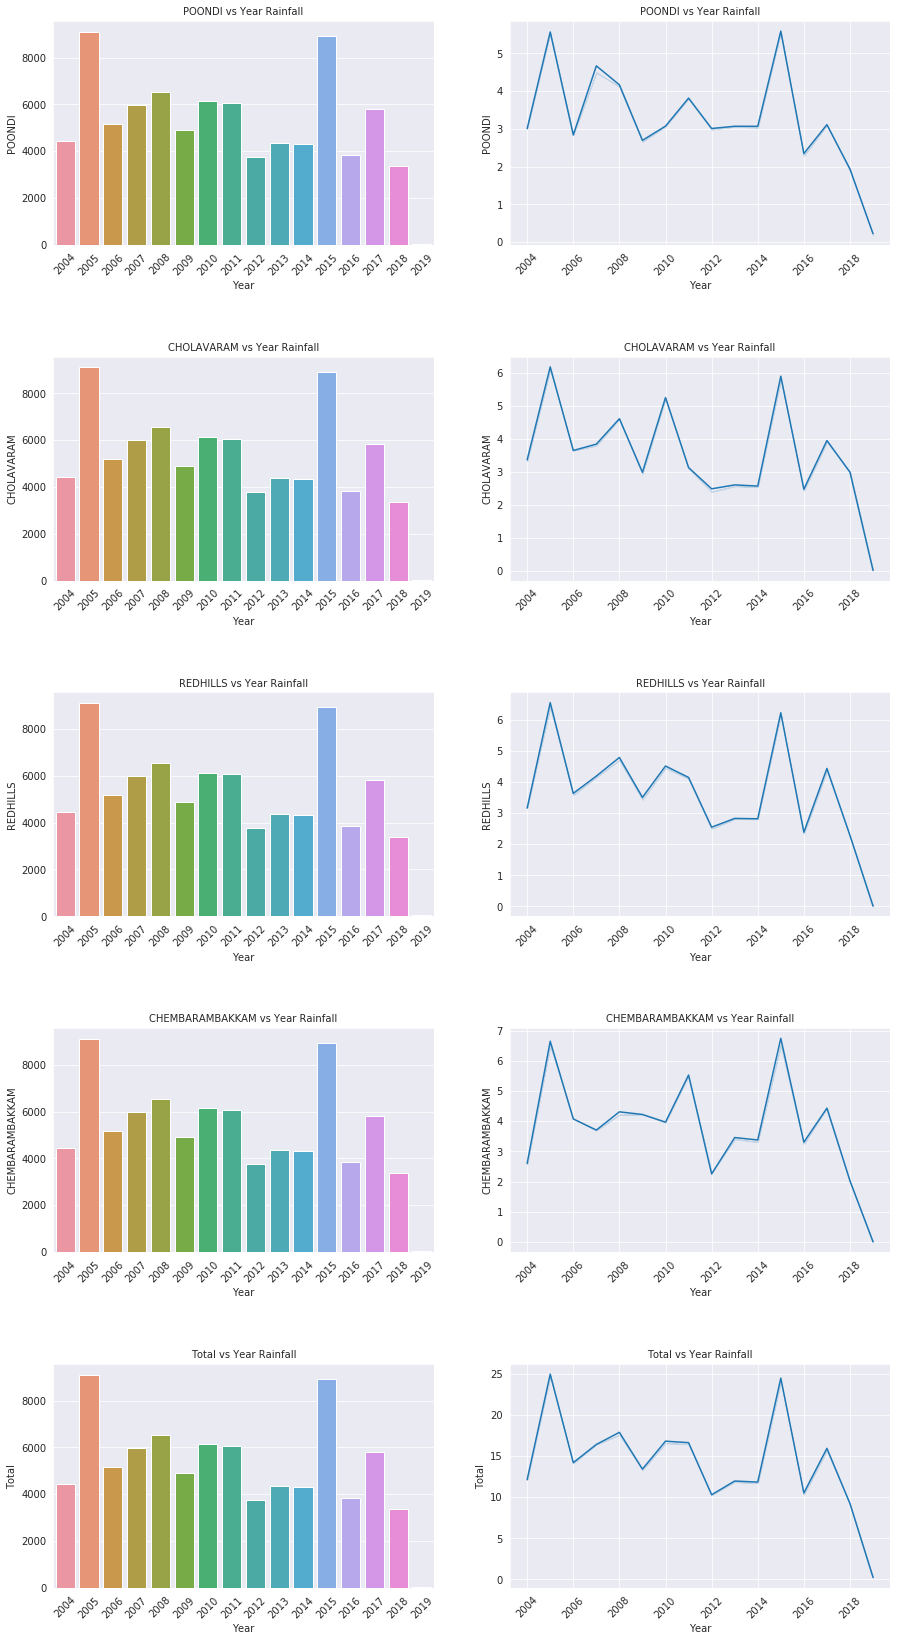

In [62]:
year =rainfall.groupby('Year').sum().reset_index()

plt.figure(figsize = (15,35))

i = 0
for Lake in Lakes:
    plt.subplot(6,2, i+1)
    sns.barplot( x= 'Year' ,y = lake, data = year)
    plt.xticks(rotation = 45)
    plt.xlabel('Year')
    plt.ylabel(Lake)
    plt.title(Lake + ' vs Year Rainfall', size = 10)
        
    plt.subplot(6,2, i+2)
    sns.lineplot(x = 'Year', y = Lake, data = rainfall,ci = False)
    plt.xticks(rotation = 45)
    plt.xlabel('Year')
    plt.ylabel(Lake)
    plt.title(Lake + ' vs Year Rainfall', size = 10)
    plt.subplots_adjust(hspace = 0.5)
    i+=2

plt.show()


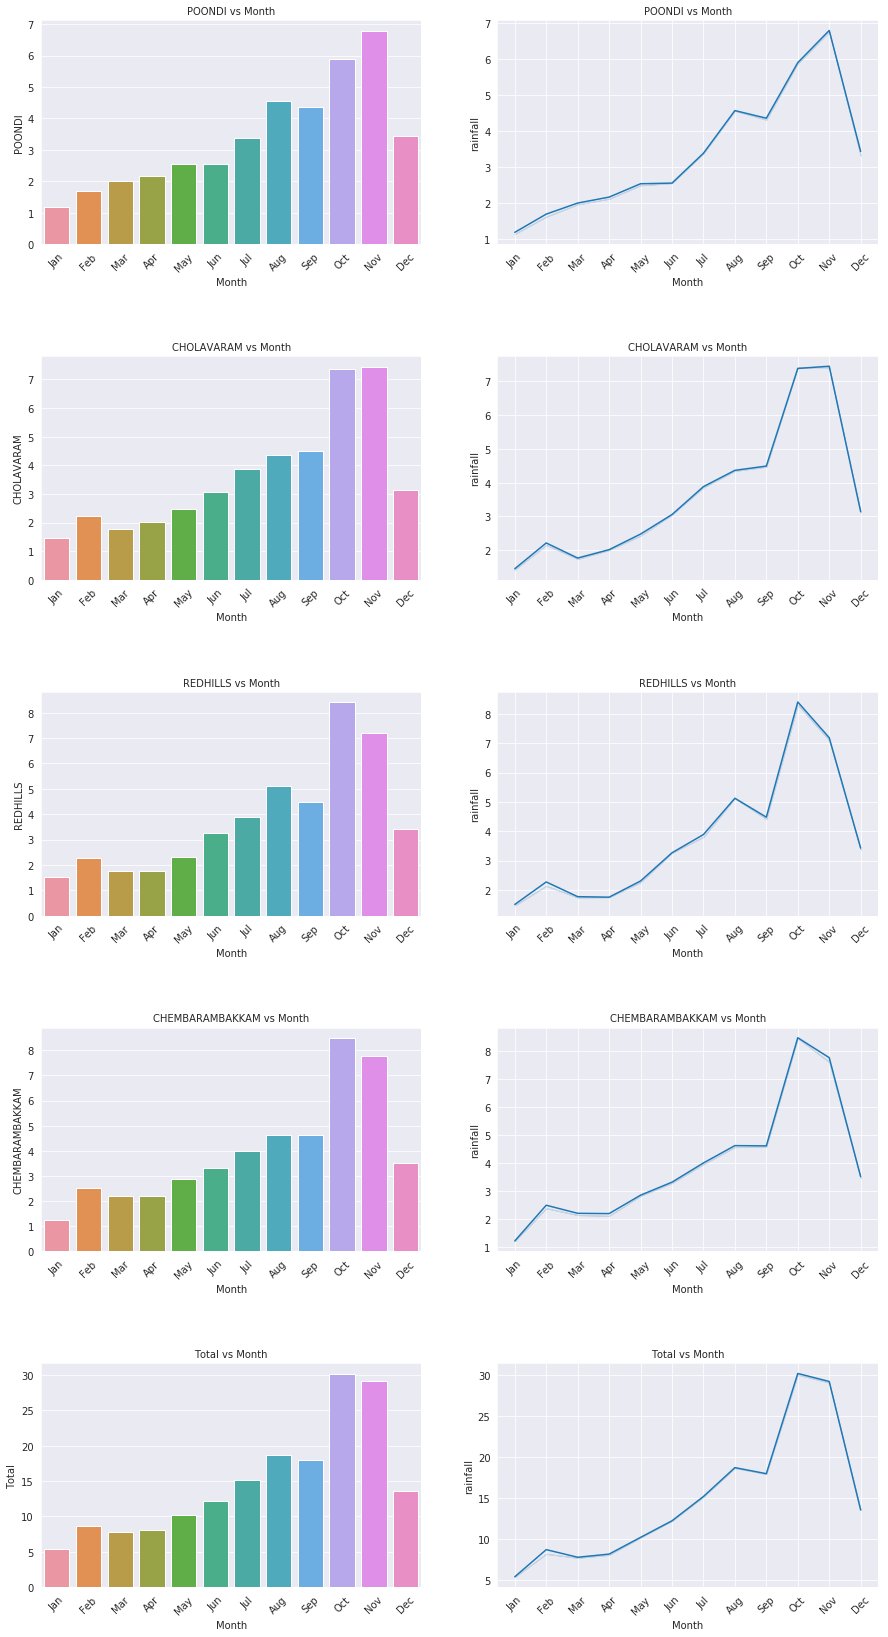

In [64]:
month = rainfall.groupby('Month').mean().reset_index()

plt.figure(figsize = (15,35))

i = 0
for Lake in Lakes:
    plt.subplot(6,2, i+1)
    sns.barplot( x= 'Month' ,y = Lake, data = month)
    plt.xticks(rotation = 45)
    plt.xlabel('Month')
    plt.ylabel(Lake)
    plt.title(Lake + ' vs Month', size = 10)
        
    plt.subplot(6,2, i+2)
    sns.lineplot(x = 'Month', y = Lake, data = rainfall, ci = False)
    plt.xticks(rotation = 45)
    plt.xlabel('Month')
    plt.ylabel('rainfall')
    plt.title(Lake + ' vs Month', size = 10)
    plt.subplots_adjust(hspace = 0.5)
    i+=2

plt.show()

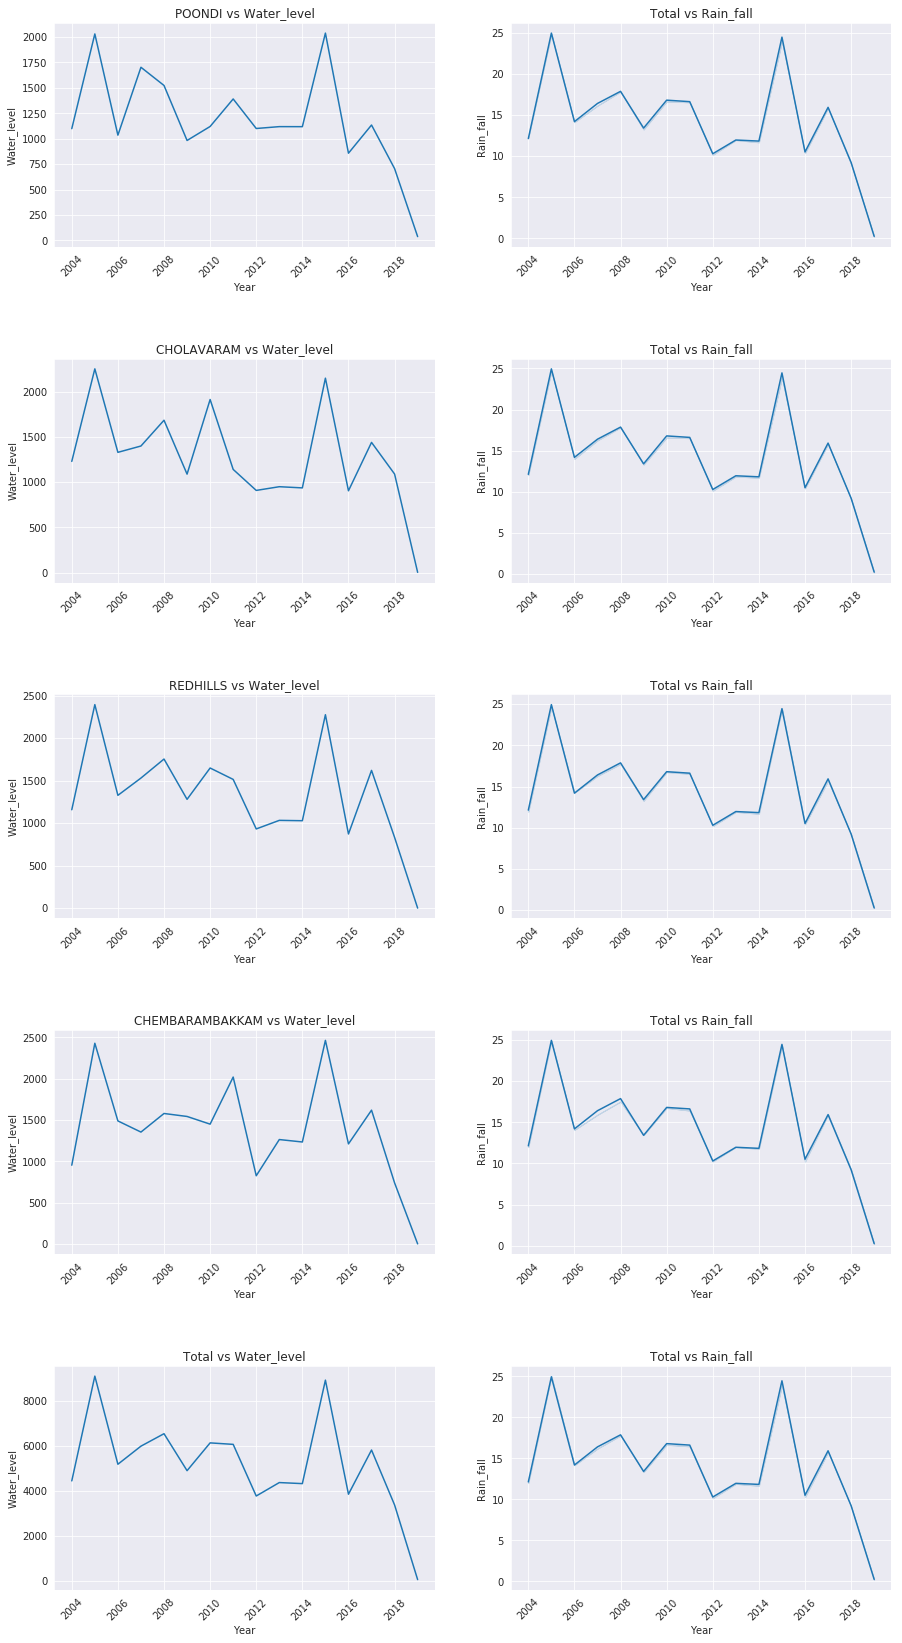

In [66]:
#year_rain_fall = rainfall.groupby('Year').sum().reset_index()


plt.figure(figsize = (15,35))
i = 0
for lake in lakes:
    plt.subplot(6,2,i+1)
    sns.lineplot(x = 'Year', y = lake, data = year, ci = False)
    plt.xticks(rotation = 45)
    plt.xlabel('Year')
    plt.ylabel('Water_level')
    plt.title(lake + ' vs Water_level')

    
    plt.subplot(6,2,i+2)
    sns.lineplot(x = 'Year', y = Lake, data = rainfall, ci= False)
    plt.xticks(rotation = 45)
    plt.xlabel('Year')
    plt.ylabel('Rain_fall')
    plt.title(Lake + ' vs Rain_fall')
    plt.subplots_adjust(hspace = 0.5)
    i+=2
plt.show()


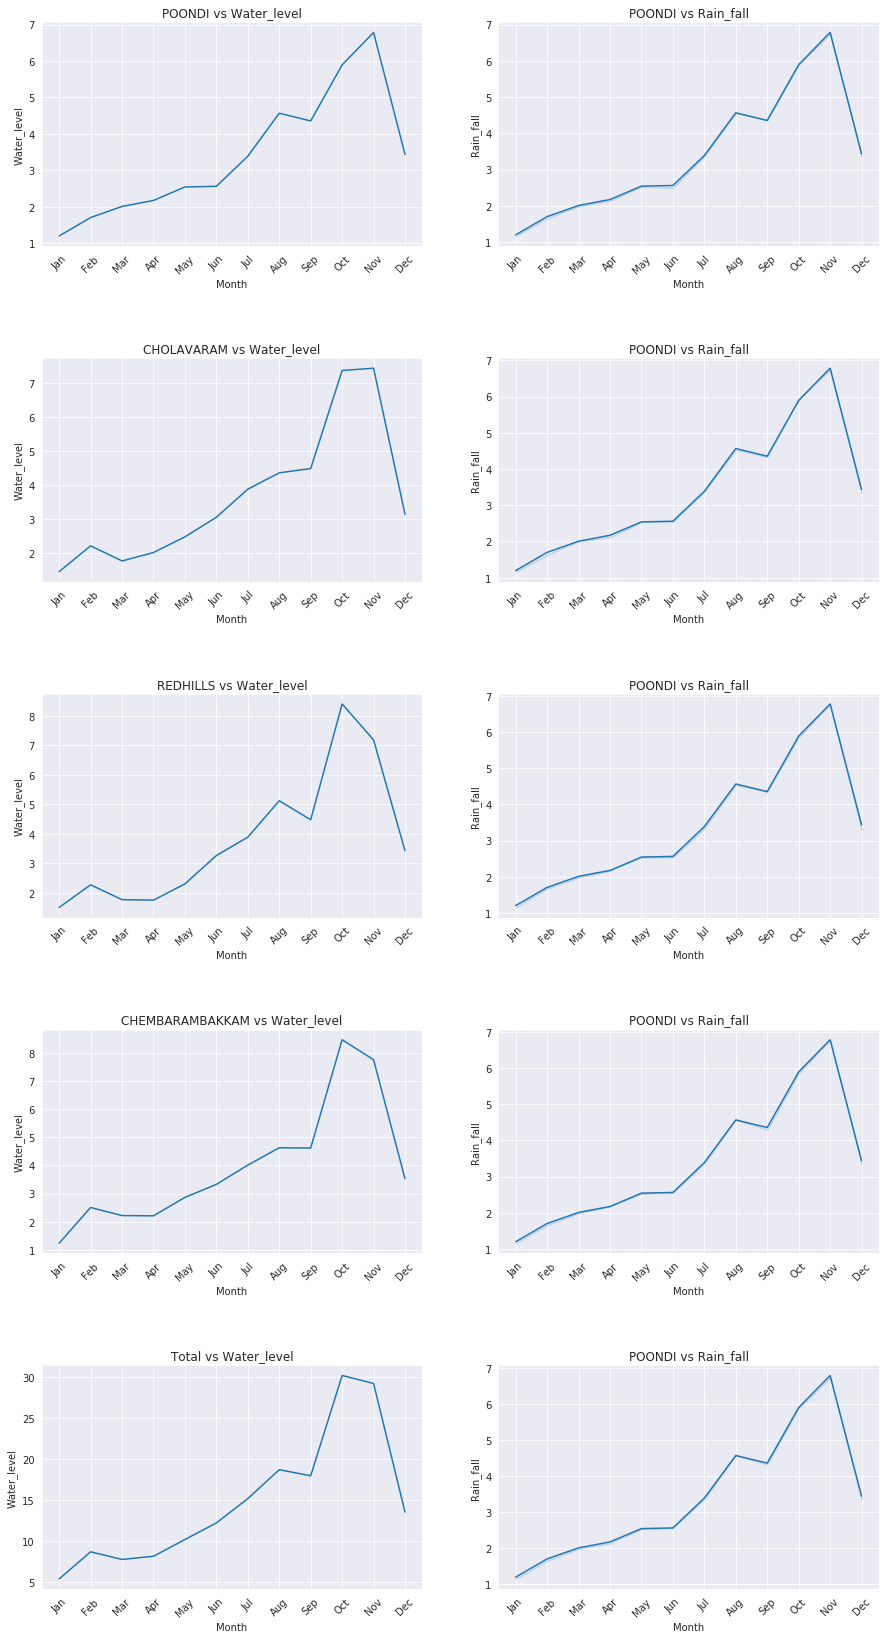

In [73]:
month_rain_fall = rainfall.groupby('Month').mean().reset_index()


plt.figure(figsize = (15,35))
i = 0
for lake in lakes:
    plt.subplot(6,2,i+1)
    sns.lineplot(x = 'Month', y = lake, data = month, ci = False)
    plt.xticks(rotation = 45)
    plt.xlabel('Month')
    plt.ylabel('Water_level')
    plt.title(lake + ' vs Water_level')
  
    plt.subplot(6,2,i+2)
    sns.lineplot(x = 'Month', y = Lake, data = rainfall, ci = False)
    plt.xticks(rotation = 45)
    plt.xlabel('Month')
    plt.ylabel('Rain_fall')
    plt.title(Lake + ' vs Rain_fall')
    plt.subplots_adjust(hspace = 0.5)
    i+=2
plt.show()
